# JSS Performance Evaluation

We collect data from N runs processing 100 deployment changes moving the accounting node between Germany and the USA.

Initially, we read the (test) data frame containing values for
 * total time between incoming event (this should be also measuring time) and reconfiguration of probes
 * model update includes code to model level mapping and actual PCM model update
 * privacy update is the complete time necessary to recomupte the privacy properties
 * configuration time is the time used to take the privacy result, compute probe configuration and probe reconfiguration.

In [11]:
data = read.csv(sprintf("jss-result-%d.csv", 0))

for (loop in 1:4) {
    input = read.csv(sprintf("jss-result-%d.csv", loop))
    data <- rbind(data, input)
}

length(data[,1])

data

[1] 140

date,configuration.time,model.update,reaction.time,privacy.update,total.processing
0,640355,217731,1368427,1186864,1361646
-9066705243,1035271,201685,1984776,1902763,1965132
9198887186,1039417,227506,2045696,1903676,2020761
-36780952966,1109404,129883,1830844,1885948,1818012
-64191104704,1761982,305432,2959209,3621852,2943810
-54735715837,890192,149251,1613712,1683025,1589134
9623920433,568235,152744,1139131,1073351,1132291
-72971278694,1668538,568879,2923693,2585814,2874840
-46253956438,1240904,222090,2402883,2585361,2367189
-73516095282,2272812,361798,3643514,4024472,3629378


## Load plot libraries and define common R functions

In [12]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)

plotFunc <- function(input, column, label, upperLimit, shape) {
    col <- input[,column]
    return (ggplot(input, aes (y=col, x="")) + geom_boxplot(outlier.shape = shape) + ylab("Time [ns]") + xlab(label) + ylim(0,upperLimit))
}

plotAll <- function(data, upperlimit, shape){
    plots <- list()

    i <- 1
    for (label in colnames(data)) {
        if ( i > 1 ) {
            label <- gsub("[.]", " ",label)
            plots[[i-1]] <- plotFunc(data,i,label,upperLimit, shape)
        }
        i <- i + 1
    }

    ggarrange(plotlist=plots, ncol = length(plots), nrow = 1)
}

options(repr.plot.height=3)

## Measurements

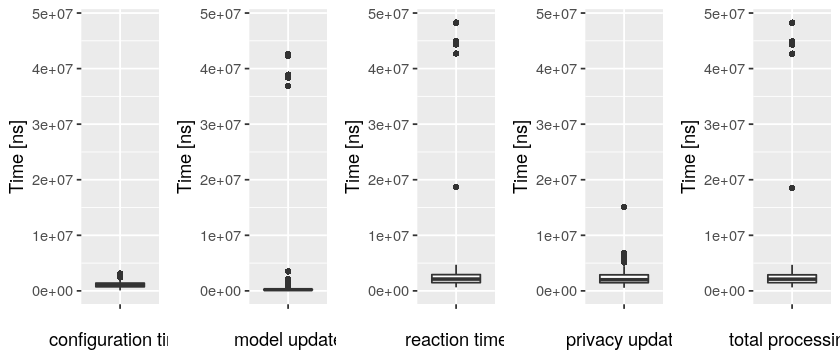

In [13]:
upperLimit <- max(data[,"total.processing"],data[,"reaction.time"])

plotAll(data,upperLimit, 16)

Measurements over Time

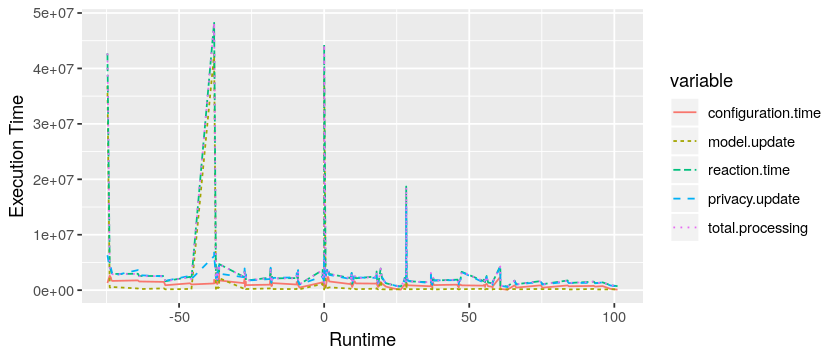

In [14]:
library(reshape2)

plotData <- data
plotData[,"date"] <- plotData[,"date"]/1000/1000/1000

allColumns <- colnames(data)
measureColumns <- allColumns[2:length(allColumns)]

ggData <- melt(plotData, id.vars = "date", measure.vars = measureColumns)

ggplot(ggData, aes(x=date, y=value, linetype = variable, color = variable)) + geom_line() + xlab("Runtime") + ylab("Execution Time")

## Measurements without depicting outliers

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 18 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 18 rows containing non-finite values (stat_boxplot).”

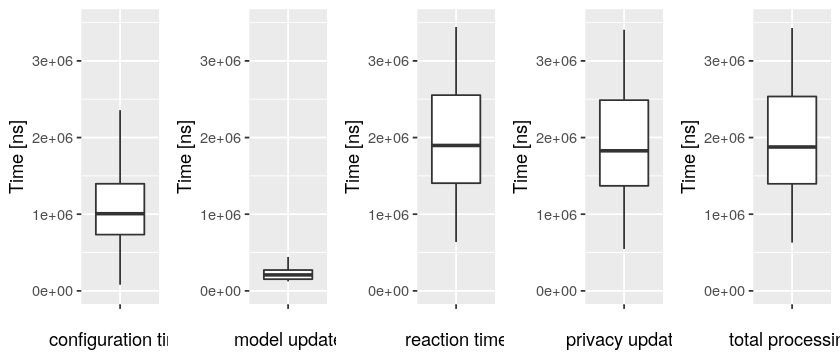

In [15]:
upperLimit <- 3500000

plotAll(data, upperLimit, NA)

In [16]:
label.vals <- c()
mean.vals <- c()
median.vals <- c()
var.vals <- c()

unit.conversion <- 1000 * 1000

i <- 1
for (label in colnames(data)) {
    label.vals[[i]] <- gsub("[.]", " ",label)
    input <- data[,i] / unit.conversion
    median.vals[[i]] <- median(input)
    mean.vals[[i]] <- mean(input)
    var.vals[[i]] <- var(input)
    i <- i + 1
}

result <- data.frame("measurement" = label.vals, "mean" = mean.vals, "median" = median.vals, "variance" = var.vals)

result

measurement,mean,median,variance
date,10079.917093,9473.035810,1.748378e+09
configuration time,1.114408,1.006728,3.337152e-01
model update,1.701697,0.212518,5.447072e+01
reaction time,3.836044,2.124461,6.827913e+01
privacy update,2.388042,2.012293,2.642410e+00
total processing,3.817046,2.105523,6.823182e+01


All values are in milli seconds.
* _Total processing_ time is the sum of _privacy update_ time and _model update_ time
* _Reaction time_ includes _configuration time_ and _total processing_ time. Still it is lower than _configuration time_ plus _total processing_ time, as the filters for _privacy update_, _model update_ and _configuration_ run in separate threads.